In [4]:
# Music player in python
from pygame import mixer
mixer.init()
# --------------------------Path of your music
mixer.music.load("../DataBase/108.wav")
mixer.music.set_volume(0.5)
mixer.music.play()

while True:
    print("PAUSE 'p' RESUME 'r' SET VOL 'v' EXIT 'e'")
    ch = input("['p','r','v','e']>>>")
    if ch == "p":
        mixer.music.pause()
    elif ch == "r":
        mixer.music.unpause()
    elif ch == "v":
        v = float(input("Enter volume(0 to 1): "))
        mixer.music.set_volume(v)
    elif ch == "e":
        mixer.music.stop()
        break


pygame 2.1.0 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
PAUSE 'p' RESUME 'r' SET VOL 'v' EXIT 'e'


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Duration 1 = 0.96s
Duration 2 = 1.0320181405895692s
Sr 1 = 22050
Sr 2 = 22050


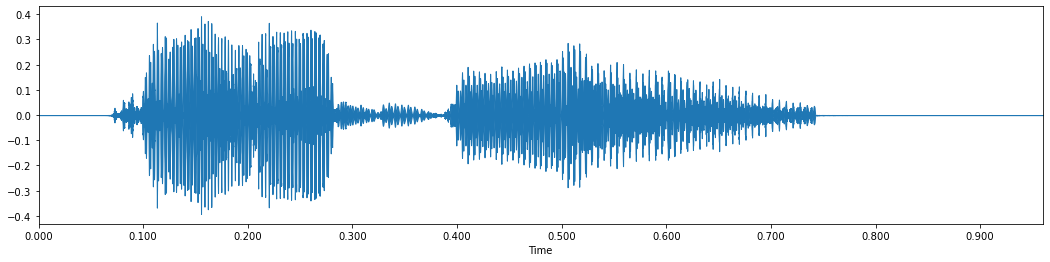

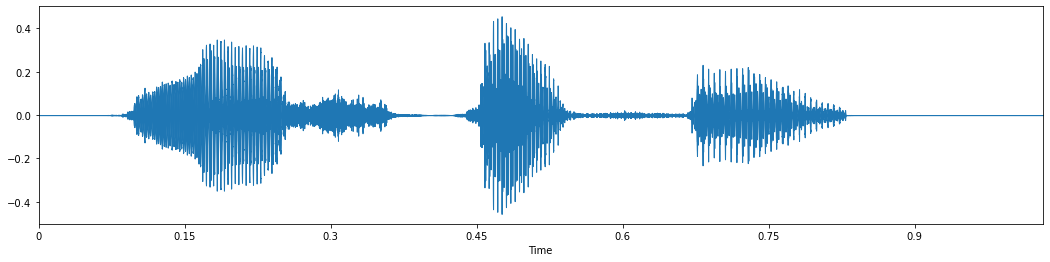

In [27]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

wav_fname1 = "../DataBase/names/Radwa.wav"
wav_fname2 = "../DataBase/names/Mostafa.wav"

data1,sr1=librosa.load(wav_fname1)
data2,sr2=librosa.load(wav_fname2)

plt.figure(figsize=(18,4))
librosa.display.waveplot(data1,sr1)

plt.figure(figsize=(18,4))
librosa.display.waveplot(data2,sr2)

print(data1) # (n samples , 0)
print(data2) # (n samples , 0)
length1 = data1.shape[0] / sr1
length2 = data2.shape[0] / sr2
print(f"Duration 1 = {length1}s")
print(f"Duration 2 = {length2}s")
print(f"Sr 1 = {sr1}")
print(f"Sr 2 = {sr2}")
# from sklearn import preprocessing
# preprocessing.normalize([data])
# plt.figure(figsize=(18,4))
# librosa.display.waveplot(data,sr)


[-451.48038 -160.97069 -151.33505 -236.29027 -272.63458 -197.46675
 -204.80573 -269.418   -462.2217  -557.2985 ]
(13, 11)


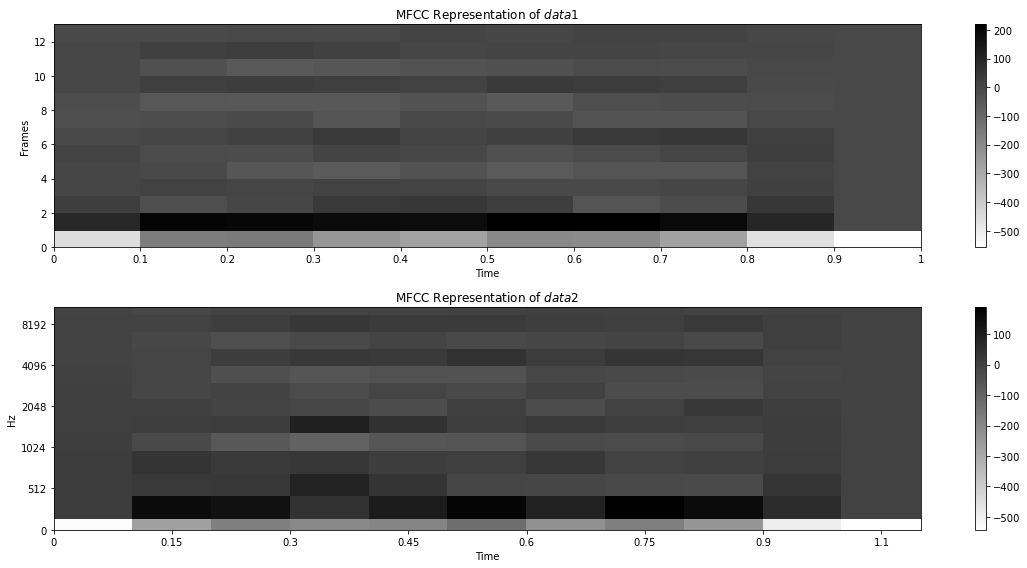

In [28]:
n_fft = 4410
hop_size = 2205
mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('MFCC Representation of $data1$')
librosa.display.specshow(mfcc1, x_axis='time',y_axis='frames', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('MFCC Representation of $data2$')
librosa.display.specshow(mfcc2, x_axis='time',y_axis='mel', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()
print(mfcc1[0])
print(mfcc2.shape)

D = [[0.01984477 0.07974742 0.2440919  0.45269607 0.57332546 0.87637003
  0.92476222 1.12847727 1.22458815 1.23002224 1.25646097]
 [0.40361642 0.12960782 0.16293701 0.55837561 0.61532215 0.60866317
  0.76858555 0.79311014 0.85669635 1.17284586 1.57484513]
 [0.82066096 0.26056232 0.18339877 0.50527037 0.6543496  0.62852554
  0.79743855 0.81540775 0.87609431 1.20603893 1.60703368]
 [1.07417958 0.31552789 0.20953751 0.37099084 0.44097603 0.50247948
  0.61523567 0.67729467 0.72138941 0.9172682  1.18796337]
 [1.24576327 0.33522805 0.23981976 0.41013738 0.42751994 0.53219708
  0.56364006 0.63005126 0.67098335 0.79195784 0.98039441]
 [1.59342218 0.43301455 0.28118435 0.54240986 0.52337111 0.45725716
  0.61605275 0.60135024 0.66848975 0.95056995 1.15548981]
 [1.92608356 0.53489484 0.37119145 0.66366944 0.68917401 0.49866664
  0.60716303 0.61648817 0.637953   0.91293227 1.25825994]
 [2.115954   0.57526373 0.4366874  0.63775378 0.7415818  0.58427672
  0.574879   0.61288559 0.62325708 0.76732859 

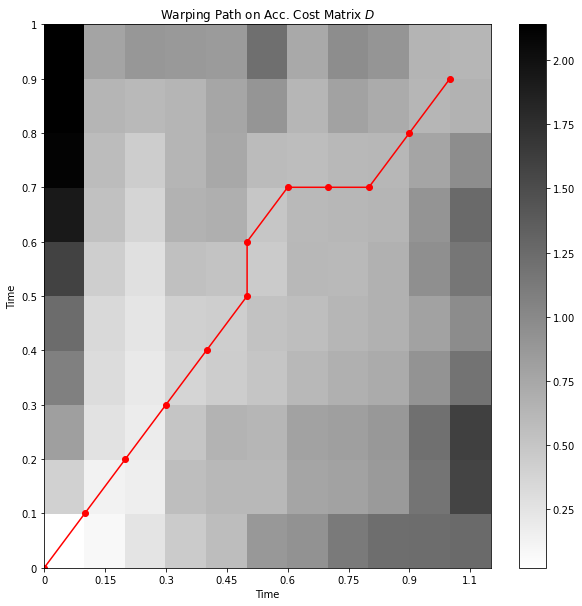

In [29]:
import librosa.sequence
import numpy as np
# scipy.spatial.distance.cdist(XA, XB, metric='euclidean', *, out=None, **kwargs) Compute distance between each pair of the two collections of inputs.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
# metric : str Identifier for the cost-function as documented in scipy.spatial.distance.cdist()
D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
wp_s = np.asarray(wp) * hop_size / sr1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()
print(f"D = {D}")
print(f"wp = {wp}")

In [31]:
# from fastdtw import fastdtw
# fastdtw(mfcc1,mfcc2)

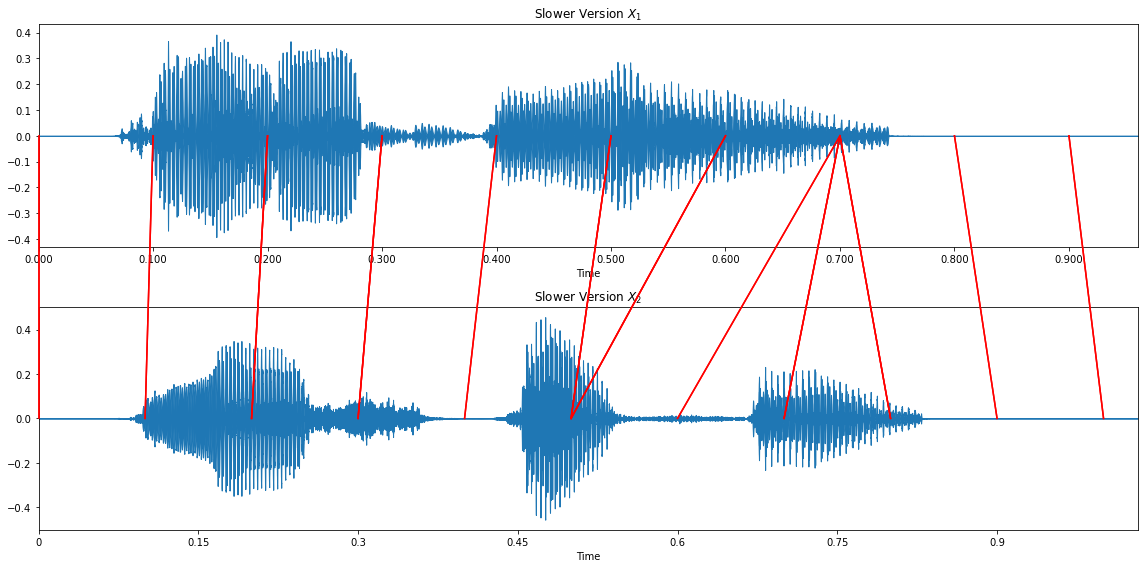

In [32]:
import matplotlib
fig = plt.figure(figsize=(16, 8))
# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(data1, sr=sr1)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(data2, sr=sr2)
plt.title('Slower Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / sr1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [10]:
# import datetime as dt
# xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
import numpy as np
print(np.array(data1))

[0. 0. 0. ... 0. 0. 0.]


In [11]:
import sys, os, os.path
from scipy.io import wavfile
import pandas as pd

# wav_fname = input("Input file number:")
# wav_fname = "../DataBase/108.wav"

# if wav_fname[-3:] != 'wav':
#     print('WARNING!! Input File format should be *.wav')
#     sys.exit()
# samrate, data = wavfile.read(str('./wavfile/' + wav_fname))
# # print('Load is Done! \n')
# wavData = pd.DataFrame(data)
# if len(wavData.columns) == 2:
#     print('Stereo .wav file\n')
#     wavData.columns = ['R', 'L']
#     stereo_R = pd.DataFrame(wavData['R'])
#     stereo_L = pd.DataFrame(wavData['L'])
#     print('Saving...\n')
#     stereo_R.to_csv(str(wav_fname[:-4] + "_Output_stereo_R.csv"), mode='w')
#     stereo_L.to_csv(str(wav_fname[:-4] + "_Output_stereo_L.csv"), mode='w')
#     # wavData.to_csv("Output_stereo_RL.csv", mode='w')
#     print('Save is done ' + str(wav_fname[:-4]) + '_Output_stereo_R.csv , '
#                           + str(wav_fname[:-4]) + '_Output_stereo_L.csv')
# elif len(wavData.columns) == 1:
#     print('Mono .wav file\n')
#     wavData.columns = ['M']
#     wavData.to_csv(str(wav_fname[:-4] + "_Output_mono.csv"), mode='w')
#     print('Save is done ' + str(wav_fname[:-4]) + '_Output_mono.csv')
# else:
#     print('Multi channel .wav file\n')
#     print('number of channel : ' + len(wavData.columns) + '\n')
#     wavData.to_csv(str(wav_fname[:-4] + "Output_multi_channel.csv"), mode='w')

#     print('Save is done ' + str(wav_fname[:-4]) + 'Output_multi_channel.csv')

In [15]:
# Radwa vs Raouf
# best_cost = D[wp[-1, 0], wp[-1, 1]]
# print(best_cost)

0.01940006157587193


In [21]:
# Radwa vs Radwa
# best_cost = D[wp[-1, 0], wp[-1, 1]]
# print(best_cost)

0.0


In [26]:
# Radwa vs Ahmed
# best_cost = D[wp[-1, 0], wp[-1, 1]]
# print(best_cost)

0.018042555758758128


In [33]:
# Radwa vs Mostafa
# best_cost = D[wp[-1, 0], wp[-1, 1]]
# print(best_cost)

0.019844768226561227
